# *Bike price prediction*

- Dataset acquired from kaggle-https://www.kaggle.com/nehalbirla/motorcycle-dataset
- The task is to Predict the best Sell Price for used bikes with the available features 

In [1]:
import pandas as pd
import numpy as np
import datetime                      #Importing the necessary libraries
from datetime import date 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor    
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

%matplotlib inline

In [2]:
data=pd.read_csv("bikeprice.csv")

#### Understanding the dataset

In [3]:
data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
data.shape

(1061, 7)

- The dataset contains 7 features with selling_price being the dependent feature
- There are a total of 1061 data points

----

In [5]:
maxprice=data["selling_price"].max()
minprice=data["selling_price"].min()

In [6]:
mx = data[data['selling_price']>=maxprice] 
mx

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
295,Suzuki GSX S750,760000,2019,Individual,1st owner,2800,752020.0


In [7]:
mn = data[data['selling_price']<=minprice]
mn

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
543,TVS Excel,5000,1998,Individual,1st owner,60000,NaN


- The Suzuki GSX S750 is the bike with the highest selling price of 760000
- The TVS Excel	 is the bike with least selling price 5000

--------

In [8]:
data["year"].value_counts()

2017    133
2018    131
2016    107
2015    100
2014     91
2019     86
2013     73
2012     70
2011     61
2010     60
2007     29
2009     28
2008     28
2006     20
2005     14
2000      6
2004      5
1998      3
2020      3
2002      3
2001      2
1997      2
1999      1
2003      1
1995      1
1993      1
1991      1
1988      1
Name: year, dtype: int64

- The year column gives the year of purchase of the bike
- There are bikes as old as 1991 and as new as 2019

--------

In [3]:
date=datetime.datetime.now()    #extracting the current year
print(date.year)

2020


In [4]:
data['age']=date.year-data["year"]  #Finding the age of the vehicle by subtracting the current year and its year of manufacture 

In [11]:
data.head() #new column has been "age" has been created 

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,1
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,3
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,2
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,5
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,9


----------

- The fuel column gives the type of fuel the vehicle runs on
- There are the usual 5 types with majority of the vehicles running on Diesel and Petrol

In [13]:
data["seller_type"].value_counts()

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

- There are 2 seller types 
- Most of the sellers being the owners of the bikes themselves 

In [15]:
data["owner"].value_counts()

1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64

- The owner column gives the number of previous owners of the vehicle
- First owner are in the majority

In [16]:
data.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
age                    0
dtype: int64

In [5]:
data.dropna(inplace=True)

- There are 435 null vales 
- since the ex showroom price feature contains the null values , it is probably a safe idea to drop the rows with the null values

In [6]:
data.shape

(626, 8)

### EDA-Exploratory data analysis

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

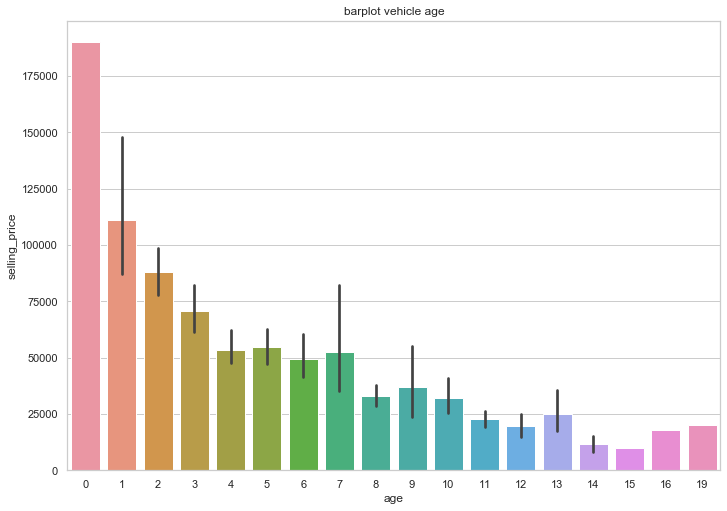

In [21]:
sns.set(style="whitegrid")
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x="age", y="selling_price", data=data,ax=ax)
plt.title("barplot vehicle age")
plt.plot

- The Barplot is for the vehicle age and its selling price
- While the Brand of the vehicle plays a major role in its selling price, It is clear from the plot that lesser the age,the higher it can be sold for

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

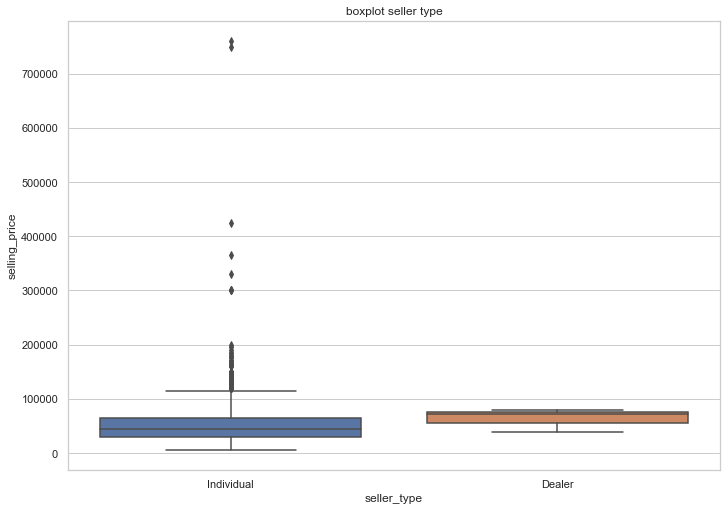

In [26]:
sns.set(style="whitegrid")
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="seller_type", y="selling_price", data=data,ax=ax)
plt.title("boxplot seller type")
plt.plot

- From the box plot we can see that the seller type does not affect the price in a drastic way

-------

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

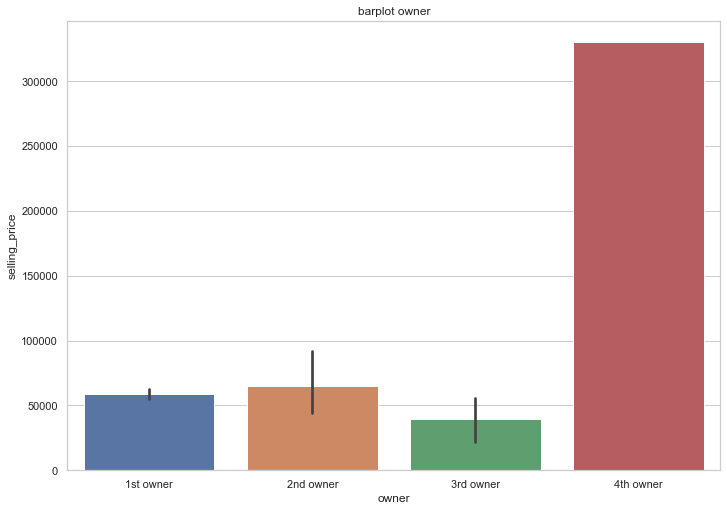

In [27]:
sns.set(style="whitegrid")
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x="owner", y="selling_price", data=data,ax=ax)
plt.title("barplot owner")
plt.plot

- The general rule of thumb is that a less that less the previous owners of the vehicle more the price 
- The 4th owner category is probably biased as there are only 3 points as seen in the beginning
- To avoid overfitting the 4th owner varialbe is removed 

In [7]:
data.drop(data[data['owner'] == '4th owner'].index, inplace = True)

In [8]:
data.shape

(625, 8)

#### Featurization

In [9]:
data.drop(['year'],axis=1,inplace=True)   #Dropping the year and name columns
data.drop(['name'],axis=1,inplace=True)

In [10]:
data.replace({'1st owner':1,'2nd owner':2,'3rd owner':3}, inplace=True)

- Previous owners of the vehicle can be considered as categorical ordinal data
- Hence, replacing the owner with the respective number 

In [11]:
data1=pd.get_dummies(data,drop_first=True) 

- Using the dummy variable from pandas to convert the all categorical nominal text features to numerical data
- This is similar to one hot encoding 

In [12]:
data1.head()

,selling_price,owner,km_driven,ex_showroom_price,age,seller_type_Individual
2,150000,1,12000,148114.0,2,1
3,65000,1,23000,89643.0,5,1
5,18000,1,60000,53857.0,10,1
6,78500,1,17000,87719.0,2,1
9,50000,1,42000,60122.0,4,1


#### Modelling

In [13]:
y=data1['selling_price'].values       #Seperating the dependent variable
X=data1.drop(['selling_price'],axis=1)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #Splitting the data to train and test

In [17]:
print(X_train.shape )
print(X_test.shape)

(500, 5)
(125, 5)


- The train data now has 500 points and 5 features
- Test data has 125 points and same number of features 

In [18]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]   
min_samples_split = [2, 5, 10, 15, 100]   #initiating the parameters for the model to be used in hyperparameter tuning
min_samples_leaf = [1, 2, 5, 10]

In [19]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [20]:
model=RandomForestRegressor()  #initiating the model for hyperparameter tuning

In [21]:
rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid,scoring='neg_mean_squared_error', n_iter= 10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [22]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [23]:
print(rf_random.best_params_)

{'n_estimators': 700, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}


----------

- Using randomsearch for the hyperparameter tuning to find the best parameters 
- The base model is randomforest 
- after fitting the model ,the best parameters are found
- using the same for the actual model

-------------

In [24]:
#training the model
rmodel=RandomForestRegressor(n_estimators=700,max_depth=20,min_samples_split=15,min_samples_leaf=1,max_features='auto') 
rmodel.fit(X_train,y_train)  #fitting the trained model 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [25]:
predictions=rmodel.predict(X_test) #predicting the price for the x_test data

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

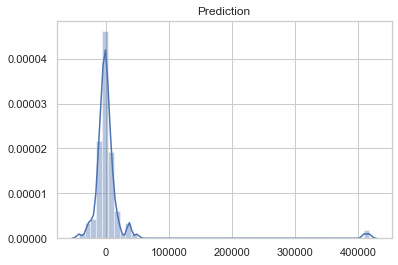

In [26]:
sns.set(style="whitegrid")
sns.distplot(y_test-predictions)
plt.title("Prediction")
plt.plot

- Plotting a graph to find out how accurate the predictions are
- The plot follows a normal distribution which implies the difference between actual price and predicted price is less
- We can hence conclude that the accuracy of the predictions are good

In [27]:
print('MAE:', round(metrics.mean_absolute_error(y_test, predictions)))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 15424.0
RMSE: 53853.0


- Calculating Mean Absolute Error and Root Mean Squared Error to find by how many points the predictions deviate from the actual value
- Both Root Mean Squared error and Mean Absolute Error are in acceptable range 

In [28]:
'''
import pickle
file = open('bike_price_model.pkl', 'wb')    #Storing the trained model in a pickle file to be used for deployment
pickle.dump(rf_random, file)
'''